<a href="https://colab.research.google.com/github/Patriol-LLC/Google-Colab/blob/main/Boom_1000_Index_ARIMA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in the csv
df = pd.read_csv('/content/Boom_1000_Index.csv')

#Data frame shape
df.shape

(246337, 9)

In [16]:
#Columns
df.columns

Index(['Unnamed: 0', 'time', 'open', 'high', 'low', 'close', 'tick_volume',
       'spread', 'real_volume'],
      dtype='object')

In [4]:
#Select dates
dates = pd.to_datetime(df['time'])

In [15]:
#Alternative way to cast dates
df['time'] = pd.to_datetime(df['time'])

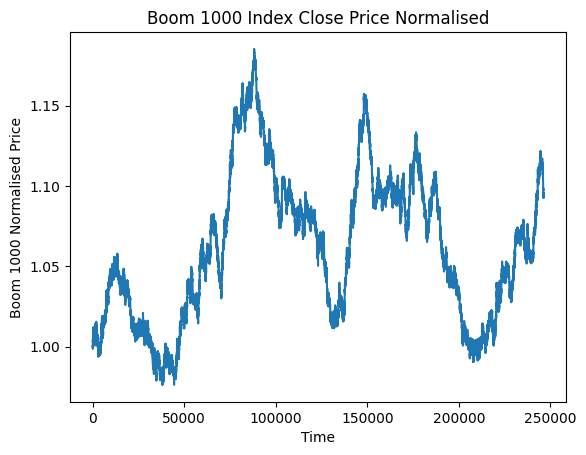

In [34]:
#Plot closing price
plt.plot((df['close']/df.loc[0,'close']))

#Plot title
plt.title('Boom 1000 Index Close Price Normalised')

#Label y-axis
plt.ylabel('Boom 1000 Normalised Price')

#Label x-axis
plt.xlabel('Time')

#Show the plot
plt.show()

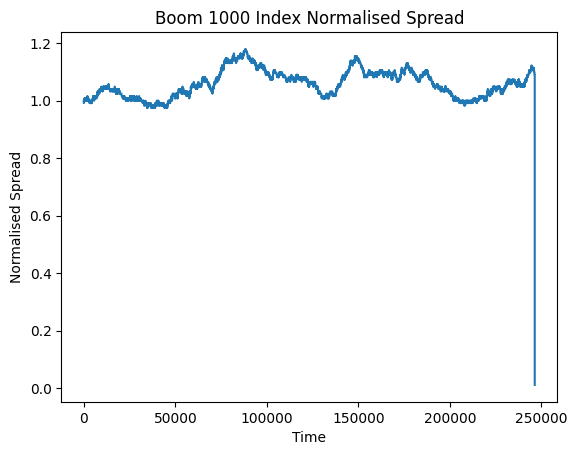

In [35]:
#Plot normalised spread
plt.plot((df['spread']/df.loc[0,'spread']))

#Plot title
plt.title('Boom 1000 Index Normalised Spread')

#Plot Y-axis title
plt.ylabel("Normalised Spread")

#Plot X-axis title
plt.xlabel('Time')

#Show plot
plt.show()

In [26]:
#Import Stats Tools
from statsmodels.tsa.stattools import adfuller

In [25]:
#Drop Unecssary Columns
df.drop(columns=['Unnamed: 0'],inplace=True)

In [27]:
#Drop Unecessary Columns
df.drop(columns=['real_volume'],inplace=True)

In [28]:
#Checking new Columns
df.columns

Index(['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread'], dtype='object')

In [31]:
#Check data types
df.dtypes

time           datetime64[ns]
open                  float64
high                  float64
low                   float64
close                 float64
tick_volume             int64
spread                  int64
dtype: object

In [37]:
#Create a time series from the date and spread
spread_time_series = df[['spread']]

In [38]:
#Inspect the time series
spread_time_series

,spread
0,1220
1,1220
2,1220
3,1220
4,1220
...,...
246332,1330
246333,1330
246334,1330
246335,1330


In [39]:
#The Dickey-Fuller test for stationarity
adf,pvalue,usedlag_, nobs_,critical_values_,icbest_ = adfuller(spread_time_series)

In [40]:
#If the P-value is above 0.05 the dataset likely isn't stationary
print('P-value: ',pvalue)

P-value:  0.4253145827775362


In [41]:
#Analyse seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
df_time_index = df.set_index('time')

ValueError: ignored